In [11]:
%pip install pandas
%pip install tensorflow
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/96/cf/a714a655266229b51eb2bda117f15275f12457887f165f3c1cc58ab502f1/scikit_learn-1.3.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/70/03/485f73046134400ea25d3cb178c5e6728f9b165f79d09638ecb44ee0e9b1/scipy-1.11.2-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ---------------------------------------- 59.1/59.1 kB 3.1 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining depe

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

In [2]:
data = pd.read_csv('dataset\churn.csv')
data = data.drop(columns=['customer_id', 'country', 'gender'])

X = data.drop(columns=['churn'])
y = data['churn']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [3]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train[0].shape)),
    Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.005)),
    Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.005)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))
predictions = model.predict(X_test[:5])
prediction_labels = [1 if p >= 0.5 else 0 for p in predictions]

print(f'Prediction Labels: {prediction_labels}')

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy on Test: {accuracy}')

Epoch 1/100
188/188 [==============================] - 2s 4ms/step - loss: 0.8842 - accuracy: 0.7883 - val_loss: 0.6505 - val_accuracy: 0.8190
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 0.5932 - accuracy: 0.8072 - val_loss: 0.5133 - val_accuracy: 0.8330
Epoch 3/100
188/188 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.8173 - val_loss: 0.4553 - val_accuracy: 0.8505
Epoch 4/100
188/188 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 0.8220 - val_loss: 0.4306 - val_accuracy: 0.8600
Epoch 5/100
188/188 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.8292 - val_loss: 0.4049 - val_accuracy: 0.8585
Epoch 6/100
188/188 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.8368 - val_loss: 0.3977 - val_accuracy: 0.8620
Epoch 7/100
188/188 [==============================] - 0s 3ms/step - loss: 0.4169 - accuracy: 0.8410 - val_loss: 0.3947 - val_accuracy: 0.8605

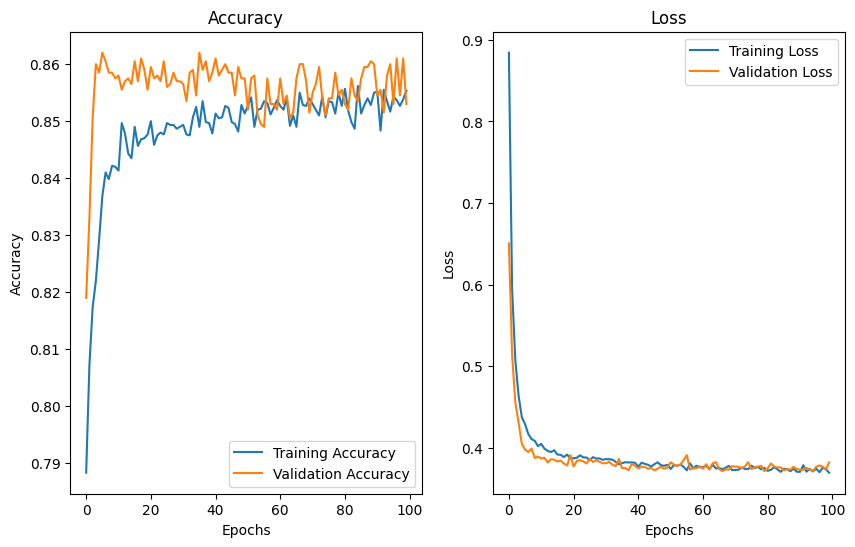

In [9]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()